DESeq2 is a very useful and versatile package for assessing differential gene expression in a dataset. Please feel free to check out the [documentation](https://bioconductor.org/packages/release/bioc/manuals/DESeq2/man/DESeq2.pdf) as well as this quick-start [guide](https://bioc.ism.ac.jp/packages/2.14/bioc/vignettes/DESeq2/inst/doc/beginner.pdf) to find out more about the full power of this package.

Let's begin by loading in DESeq2, as well as some other important packages that we will be using in our analysis. 

In [1]:
library("DESeq2")

Loading required package: S4Vectors
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, cbind, colMeans, colnames,
    colSums, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, lengths, Map, mapply, match,
    mget, order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rowMeans, rownames, rowSums, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which, which.max, which.min

Warning message:


In [2]:
library("ggplot2")

library("RColorBrewer")

Let's now import our counts matrix. Since we already generated a "clean counts" matrix, let's just import that one:

In [10]:
counts <- read.csv('/home/ucsd-train40/bms_2018/rna_seq/analysis/featurecounts/LPS_counts_matrix.csv',
                  header=TRUE, row.names=1)
head(counts)

,mouse_0h_rep1,mouse_0h_rep2,mouse_4h_rep1,mouse_4h_rep2
ENSMUSG00000103922.1,3,7,5,8
ENSMUSG00000033845.13,292,546,135,175
ENSMUSG00000025903.14,423,525,285,365
ENSMUSG00000033813.15,577,561,564,483
ENSMUSG00000103280.1,20,3,0,6
ENSMUSG00000033793.12,1086,1415,1025,1169


Let's also import the conditions matrix. We will need both for out differential expression analysis:

In [24]:
col_data <- read.csv('/home/ucsd-train40/bms_2018/rna_seq/analysis/featurecounts//LPS_conditions_for_deseq2.csv',
                  header=TRUE, row.names=1)

head(col_data)

,condition
mouse_0h_rep1,untreated
mouse_0h_rep2,untreated
mouse_4h_rep1,LPS
mouse_4h_rep2,LPS


Let's now make a DESeq Dataset as an object. This will take into account out counts and condition data, as well as experimental design (experimental variable being set as condition):

In [12]:
dds <- DESeqDataSetFromMatrix(countData = counts,
                              colData = col_data,
                              design = ~ condition)

Let's run DESeq analysis and summarize the results with res:

In [13]:
dds <- DESeq(dds)

estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing


In [14]:
res <- results(dds)

In [15]:
res

log2 fold change (MLE): condition untreated vs LPS 
Wald test p-value: condition untreated vs LPS 
DataFrame with 16082 rows and 6 columns
                          baseMean log2FoldChange     lfcSE       stat
                         <numeric>      <numeric> <numeric>  <numeric>
ENSMUSG00000103922.1      6.136029     -1.2793203 1.5654520 -0.8172211
ENSMUSG00000033845.13   254.287238      0.5377544 0.4274323  1.2581043
ENSMUSG00000025903.14   389.842484     -0.3360228 0.3678664 -0.9134370
ENSMUSG00000033813.15   558.811079     -0.7504100 0.3486345 -2.1524258
ENSMUSG00000103280.1      6.397942      1.1264332 1.8309912  0.6152040
...                            ...            ...       ...        ...
ENSMUSG00000064368.1   38651.29044     -0.6661452 1.1195446 -0.5950144
ENSMUSG00000064369.1     861.84075     -0.9611135 1.1455005 -0.8390336
ENSMUSG00000064370.1  147498.10147     -0.5913913 0.5780972 -1.0229963
ENSMUSG00000064371.1      18.83704      1.4606545 0.9571892  1.5259830
ENSMUSG00

In [16]:
summary(res)


out of 16082 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)     : 1198, 7.4% 
LFC < 0 (down)   : 1862, 12% 
outliers [1]     : 0, 0% 
low counts [2]   : 1871, 12% 
(mean count < 9)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



Let's make a graphical representation of our results given our cutoffs. In an MA plot, the x-axis is the average expression over all samples for a particular gene, while the y-axis the log2 fold change between treatment and control:

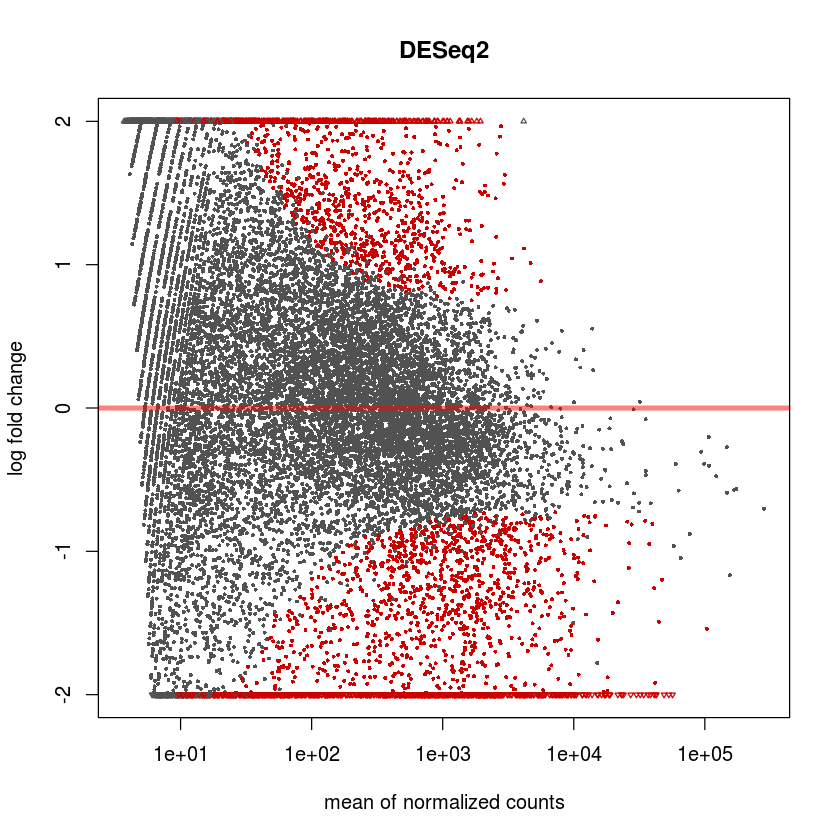

In [17]:
plotMA(res, main="DESeq2", ylim=c(-2,2))

We also have the option of adjusting our parameters of significance. Say, we wished to look at events with an padj value < 0.05. We could do the following:

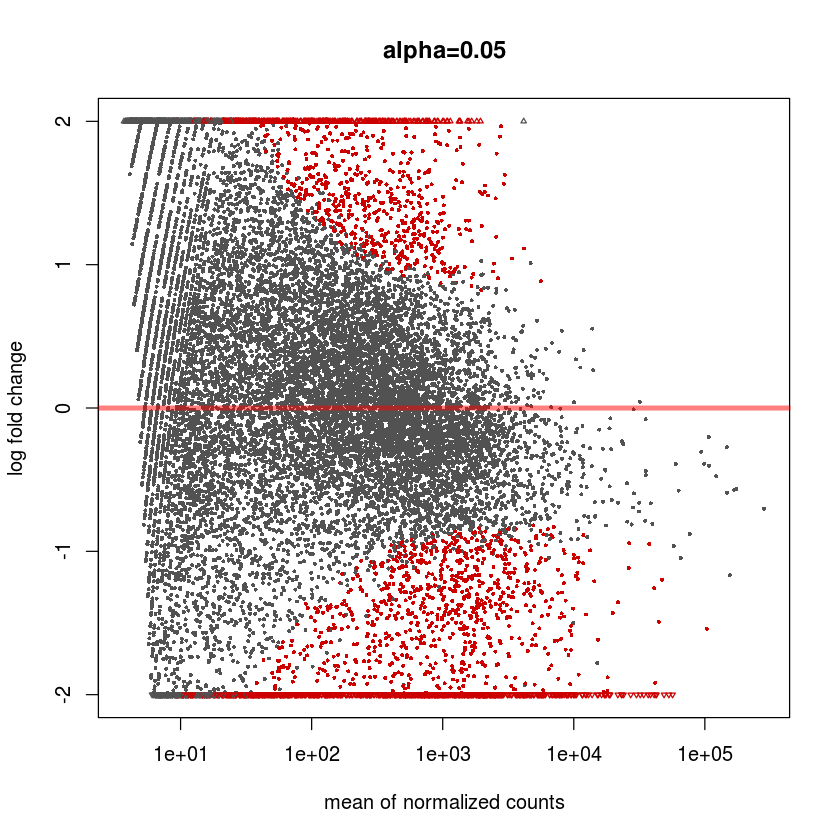

In [18]:
res05 <- results(dds, alpha=0.05)

plotMA(res05, main="alpha=0.05", ylim=c(-2,2))

Another useful quality metric is principal component analysis (PCA). This is a useful way of measuring sample-to-sample variance between and within experimental groups. This method transforms high dimensional data into a set of linearly uncorrelated variables that can then be represented on a 2D (or higher dimension) plane. Each principal component defines a degree of variance, the largest of which is represented in principal component 1 (PC1), then PC2, etc. For a more detailed intro, please check out the following [notebook](https://github.com/ryanmarina/BMS_bioinformatics_bootcamp_2018/blob/master/tutorials/Intro_to_PCA.ipynb) that Josh prepared.

$y
[1] "PC2: 7% variance"

attr(,"class")
[1] "labels"

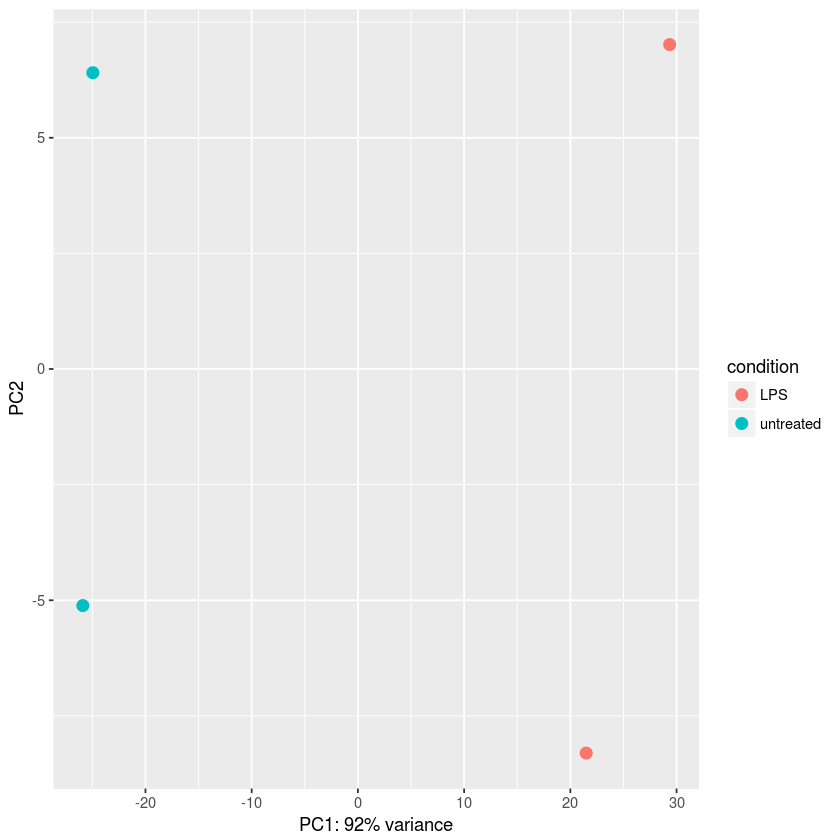

In [19]:
rld <- rlog(dds)
vsd <- varianceStabilizingTransformation(dds)

data <- plotPCA(rld, intgroup="condition", returnData=TRUE)
percentVar <- round(100 * attr(data, "percentVar"))
ggplot(data, aes(PC1, PC2, color=condition)) +
    geom_point(size=3) +
    xlab(paste0("PC1: ",percentVar[1],"% variance")) 
    ylab(paste0("PC2: ",percentVar[2],"% variance"))

Let's take our transformed data and 

Warning message in plot.window(...):
“"clustering_distance_rows" is not a graphical parameter”Warning message in plot.window(...):
“"clustering_distance_cols" is not a graphical parameter”Warning message in plot.xy(xy, type, ...):
“"clustering_distance_rows" is not a graphical parameter”Warning message in plot.xy(xy, type, ...):
“"clustering_distance_cols" is not a graphical parameter”Warning message in title(...):
“"clustering_distance_rows" is not a graphical parameter”Warning message in title(...):
“"clustering_distance_cols" is not a graphical parameter”

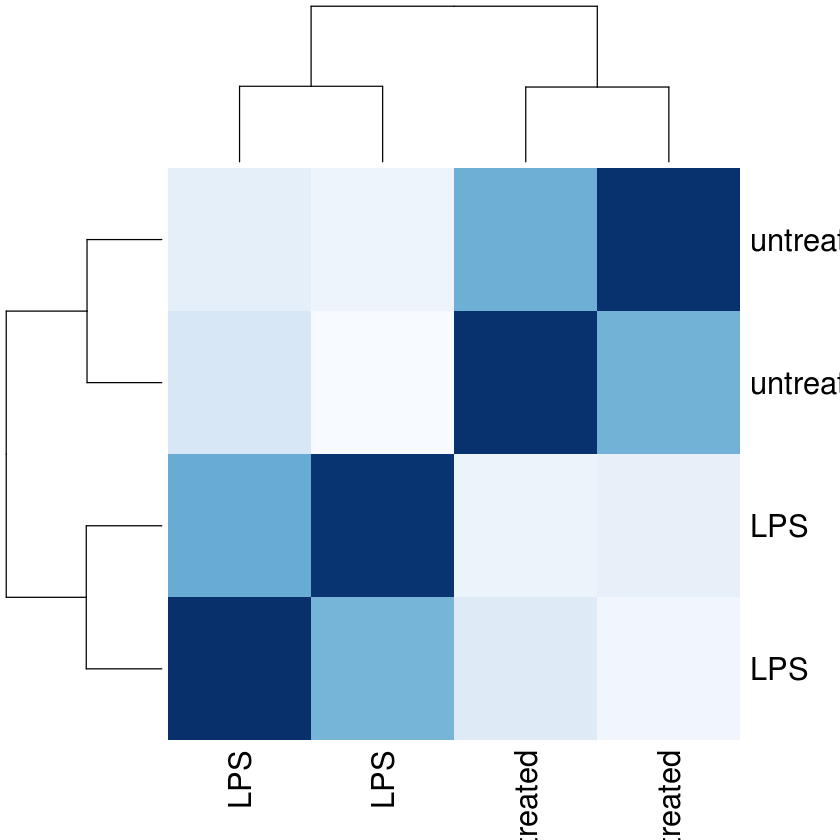

In [20]:
sampleDists <- dist(t(assay(rld)))
sampleDistMatrix <- as.matrix(sampleDists)
rownames(sampleDistMatrix) <- paste(rld$condition)
colnames(sampleDistMatrix) <- paste(rld$condition)
colors <- colorRampPalette( rev(brewer.pal(9, "Blues")) )(255)
heatmap(sampleDistMatrix,
clustering_distance_rows=sampleDists,
clustering_distance_cols=sampleDists,
col=colors)

We can also cluster variable genes in the same way that we clustered samples. To do so, we will take only the most variable genes in our dataset (let's say the top 200 variably expressed genes). We can then make a clustered heatmap based upon the fold change of our normalized read counts:

In [43]:
library( "gplots" )
library( "genefilter" )
topVarGenes <- head( order( rowVars( assay(rld) ), decreasing=TRUE ), 200 )

NULL


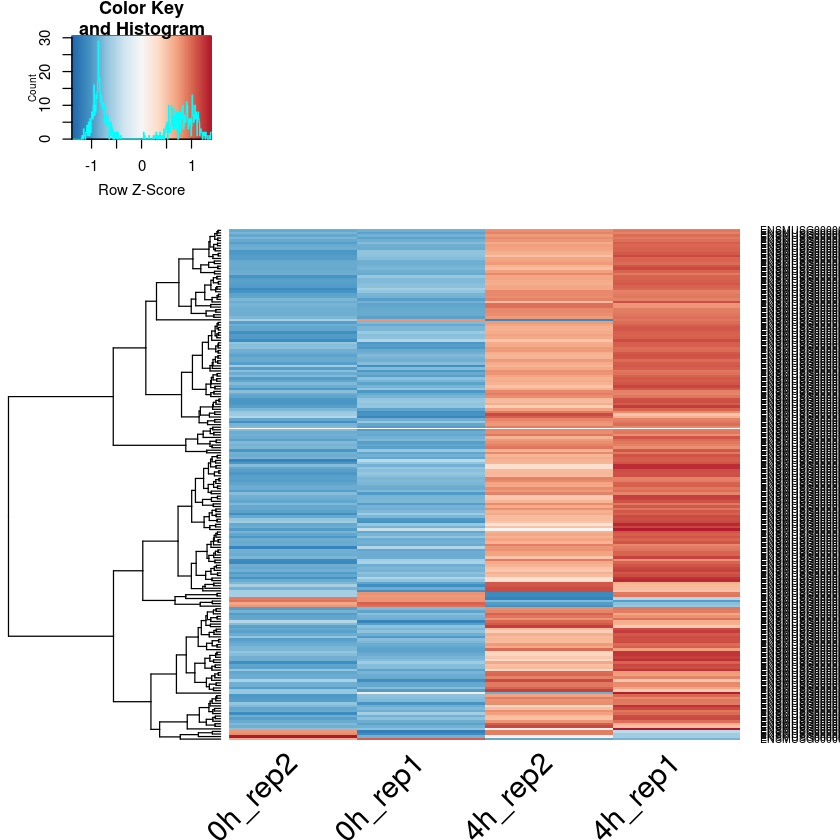

In [53]:
heatmap.2( assay(rld)[ topVarGenes, ], scale="row", 
     trace="none", dendrogram="row", 
     col = colorRampPalette( rev(brewer.pal(9, "RdBu")) )(255), 
          srtCol = 45)

Lastly, let's export our DESeq2 data table. From this, we can determine which genes are differentially expressed and what they mean with respect to our biological processes.

In [23]:
write.csv(as.data.frame(res), file="/home/ucsd-train40/projects/mouse_LPS/deseq2/dendritic_differential_expression.csv")

What about genes that 

In [51]:
res_sig = subset(res, (padj < 0.05))

log2 fold change (MLE): condition untreated vs LPS 
Wald test p-value: condition untreated vs LPS 
DataFrame with 2504 rows and 6 columns
                        baseMean log2FoldChange     lfcSE      stat
                       <numeric>      <numeric> <numeric> <numeric>
ENSMUSG00000103845.1    236.8198      -5.276291 0.6175141 -8.544405
ENSMUSG00000033740.17   206.8682      -1.190913 0.4513381 -2.638627
ENSMUSG00000025911.14   109.3729      -1.399805 0.4854261 -2.883662
ENSMUSG00000045210.8   3054.8918      -1.878497 0.3453948 -5.438695
ENSMUSG00000025915.14  1469.7108      -1.423506 0.3435151 -4.143940
...                          ...            ...       ...       ...
ENSMUSG00000031377.11   15.05997       6.936520 1.8557903  3.737771
ENSMUSG00000079316.10  571.91139      -1.013947 0.3632014 -2.791692
ENSMUSG00000044583.13 3473.14184      -1.959148 0.3697693 -5.298298
ENSMUSG00000031355.16 1200.13456      -1.894285 0.3795417 -4.990980
ENSMUSG00000072844.6    99.10171      -2.56108